# LIMPIEZA DE DATOS

In [354]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
# Lectura del Dataset
df_netflix = pd.read_csv('netflix_titles.csv')

print("\033[1;31m" + "Netflix Movies and TV Shows" + "\033[0m\n")
df_netflix.head()

Netflix Movies and TV Shows



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [322]:
# Obtener información general del Dataframe
# Incluye el número de entradas, nombres de las columnas, cantidad de valores no nulos en cada una y tipos de datos. 
# Esto es útil para identificar columnas con datos faltantes o tipos de datos incorrectos que requieren limpieza.

print("\033[1;31m" + "Información General" + "\033[0m\n")
df_netflix.info()

Información General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [324]:
# Verificar si existen filas repetidas
# Los duplicados pueden inflar los conteos y afectar la precisión de los análisis.

print("\033[1;31m" + "Existencia de Filas Repetidas" + "\033[0m")
print(df_netflix.duplicated().sum())

Existencia de Filas Repetidas
0


In [326]:
# Verificar valores faltantes por columna
# Permite detectar qué columnas tienen datos incompletos y en qué magnitud.

print("\033[1;31m" + "Valores Faltantes por Columna" + "\033[0m \n")
print(df_netflix.isnull().sum())

Valores Faltantes por Columna 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [328]:
# Eliminamos los registros donde cast, country y date_added son nulos, ya que no son muchos ni tampoco críticos para el análisis

df_netflix = df_netflix[~df_netflix['cast'].isnull()]
df_netflix = df_netflix[~df_netflix['country'].isnull()]
df_netflix = df_netflix[~df_netflix['date_added'].isnull()]

In [330]:
# Volvemos a verificar los valores nulos por columna

print("\033[1;33m" + "después de eliminar nulos en Cast, Country y Date_added" + "\033[0m \n")
print(df_netflix.isnull().sum())

después de eliminar nulos en Cast, Country y Date_added 

show_id            0
type               0
title              0
director        1960
cast               0
country            0
date_added         0
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64


In [332]:
# Revisar los registros faltantes que contienen datos nulos
# AL hacerlo, podemos darnos cuenta que los datos de duration se encuentran en rating, sin embargo, podemos eliminarlos ya que son pocos y no críticos
df_netflix[df_netflix['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [334]:
# Eliminar registros nulos en duration y rating

df_netflix = df_netflix[~df_netflix['duration'].isnull()]
df_netflix = df_netflix[~df_netflix['rating'].isnull()]

In [336]:
# Volvemos a verificar los valores nulos por columna

print("\033[1;33m" + "después de eliminar nulos en Rating y Duration" + "\033[0m\n")
print(df_netflix.isnull().sum(), "\n")

print("\033[1;31m" + "Nuevo Tamaño del DataFrame" + "\033[0m")
print(df_netflix.shape)

después de eliminar nulos en Rating y Duration

show_id            0
type               0
title              0
director        1958
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64 

Nuevo Tamaño del DataFrame
(7290, 12)


In [348]:
# Rellenar datos nulos de columna Director con Unknown
# Para no eliminar tantos registros, podemos rellenar los campos vacíos con Desconocido

df_netflix['director'] = df_netflix['director'].fillna('Unknown')
print("\033[1;31m" + "Modificar Nulos en Director" + "\033[0m \n")
df_netflix[df_netflix['director'] == "Unknown"].head()

Modificar Nulos en Director 



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
15,s16,TV Show,Dear White People,Unknown,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
17,s18,TV Show,Falsa identidad,Unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
21,s22,TV Show,Resurrection: Ertugrul,Unknown,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...


In [352]:
# Volvemos a verificar los valores nulos por columna

print("\033[1;33m" + "después de modificar Director" + "\033[0m\n")
print(df_netflix.isnull().sum(), "\n")

print("\033[1;31m" + "Nuevo Tamaño del DataFrame" + "\033[0m")
print(df_netflix.shape)

después de modificar Director

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64 

Nuevo Tamaño del DataFrame
(7290, 12)


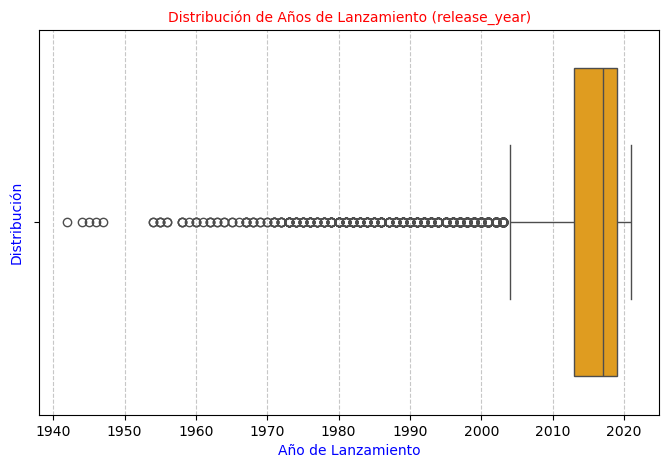

In [384]:
# Crear el boxplot para la columna 'release_year' para verificar que los datos no sean tan irregulares
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_netflix['release_year'], color = 'orange')
plt.title('Distribución de Años de Lanzamiento (release_year)', fontsize = 10, color = 'red')
plt.xlabel('Año de Lanzamiento', fontsize = 10, color = 'blue')
plt.ylabel('Distribución', fontsize = 10, color = 'blue')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

In [396]:
# Verificamos la información general

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7290 entries, 1 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7290 non-null   object
 1   type          7290 non-null   object
 2   title         7290 non-null   object
 3   director      7290 non-null   object
 4   cast          7290 non-null   object
 5   country       7290 non-null   object
 6   date_added    7290 non-null   object
 7   release_year  7290 non-null   int64 
 8   rating        7290 non-null   object
 9   duration      7290 non-null   object
 10  listed_in     7290 non-null   object
 11  description   7290 non-null   object
dtypes: int64(1), object(11)
memory usage: 740.4+ KB


In [398]:
# Y guardamos el dataset limpio para usarlo con otro nombre
df_netflix.to_csv('dataset_netflix_clean.csv')